# Task 7: Support Vector Machines (SVM)
##### Hetal Patel Dholu

_Objective: Use SVMs for linear and non-linear classification.  
Tools: Scikit-learn, NumPy, Matplotlib_

In [10]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [11]:
#load data
breast_cancer = pd.read_csv("breast-cancer.csv")

In [12]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [13]:
breast_cancer.sample(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
74,8610175,B,12.31,16.52,79.19,470.9,0.09172,0.06829,0.03372,0.02272,...,14.11,23.21,89.71,611.1,0.11760,0.18430,0.1703,0.0866,0.2618,0.07609
473,9113846,B,12.27,29.97,77.42,465.4,0.07699,0.03398,0.00000,0.00000,...,13.45,38.05,85.08,558.9,0.09422,0.05213,0.0000,0.0000,0.2409,0.06743


In [14]:
#encoding diagnosis
le = LabelEncoder()
breast_cancer['diagnosis'] = le.fit_transform(breast_cancer['diagnosis'])
print(breast_cancer['diagnosis'])

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


In [15]:
#preparing data
x = breast_cancer.drop('diagnosis',axis=1)
y= breast_cancer['diagnosis']

# Split first
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Scale
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# PCA on scaled data
pca = PCA(n_components=2)
x_train_2d = pca.fit_transform(x_train_scaled)
x_test_2d = pca.transform(x_test_scaled)


In [22]:
def plot_decision_boundary(clf, X, y, title):
    # Step size of the mesh
    h = 0.2  
    
    # Set plot limits with padding
    x_min, x_max = X[:, 0].min() - 2, X[:, 0].max() + 2
    y_min, y_max = X[:, 1].min() - 2, X[:, 1].max() + 2
    
    # Create grid with limited resolution
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
    
    # Predict on grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()


In [17]:
x_train_2d.shape

(455, 2)

In [18]:
# Train SVM with linear kernel
svm_linear = SVC(kernel='linear', C=1.0)

In [19]:
svm_linear.fit(x_train_2d, y_train)

SVC(kernel='linear')

In [20]:
# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', C=1.0, gamma=0.5)
svm_rbf.fit(x_train_2d, y_train)

SVC(gamma=0.5)

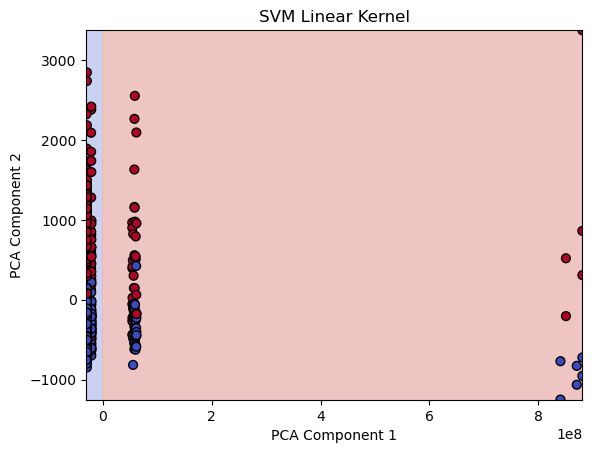

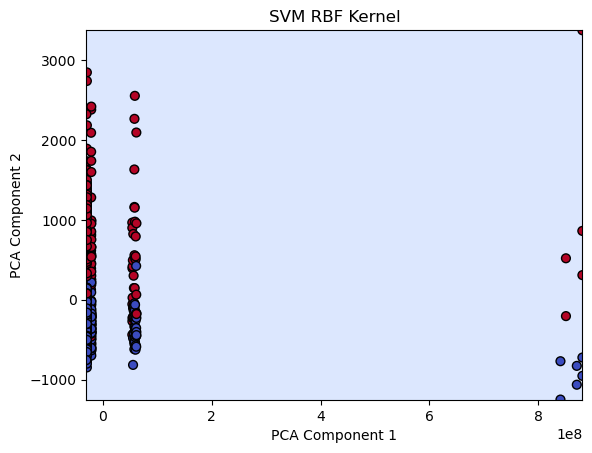

In [23]:
# 3. Visualize decision boundaries
plot_decision_boundary(svm_linear, x_2d, y, "SVM Linear Kernel")
plot_decision_boundary(svm_rbf, x_2d, y, "SVM RBF Kernel")

SVC(gamma=0.5)

In [25]:
#Hyperparameter tuning for RBF kernel
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 0.5, 1], 'kernel': ['rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(x_train_2d, y_train)
print("Best parameters:", grid_search.best_params_)



Best parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


In [30]:
# 5. Evaluate performance using cross-validation
best_svm = grid_search.best_estimator_
cv_scores = cross_val_score(best_svm, x_2d, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Cross-validation accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.62280702 0.62280702 0.63157895 0.63157895 0.62831858]
Cross-validation accuracy: 0.6274181027790716


In [28]:
# Classification report on test set
y_pred = best_svm.predict(x_test_2d)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95        72
           1       0.97      0.86      0.91        42

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



In [29]:
scores = cross_val_score(best_svm, x, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean CV Accuracy:", scores.mean())

Cross-Validation Scores: [0.62280702 0.62280702 0.63157895 0.63157895 0.62831858]
Mean CV Accuracy: 0.6274181027790716


-----------------------

1. What is a support vector?
A support vector is a data point that lies closest to the decision boundary (or hyperplane) in SVM.
These points are the most important because they define the position and orientation of the separating hyperplane.
Removing non-support vectors doesn’t change the decision boundary, but removing support vectors does.

2. What does the C parameter do?
C controls the trade-off between margin width and classification error:
High C → The model tries to classify all training examples correctly → narrower margin, less tolerance for misclassification → can lead to overfitting.
Low C → Allows more misclassifications → wider margin → more generalization → can reduce overfitting.

3. What are kernels in SVM?
Kernels are mathematical functions that allow SVM to operate in a higher-dimensional space without explicitly transforming the data.
They compute similarity between data points.
Common kernels:
Linear: no transformation, works when data is linearly separable.
Polynomial: captures polynomial relationships.
RBF (Radial Basis Function): captures non-linear, localized decision boundaries.
Sigmoid: similar to neural network activation.

4. Difference between Linear and RBF kernel?
Linear Kernel:
Decision boundary is a straight line (or hyperplane).
Best when data is linearly separable.
Computationally cheaper.
RBF Kernel:
Creates curved, non-linear decision boundaries.
Maps data into higher dimensions to handle non-linear patterns.
Requires tuning of gamma (controls influence of each training point).

5. Advantages of SVM
Works well in high-dimensional spaces (e.g., text classification, gene expression data).
Effective even when number of features > number of samples.
Uses only support vectors, so it’s relatively memory efficient.
Good generalization performance if hyperparameters are tuned well.
Flexible with different kernels for different data patterns.

6. Can SVMs be used for regression?
Yes ✅ → that’s called Support Vector Regression (SVR).
Instead of trying to find a separating hyperplane, SVR tries to fit a function within a tolerance margin (epsilon).
Useful for predicting continuous values.

7. What happens when data is not linearly separable?
SVM uses soft margin classification with parameter C, allowing misclassifications.
Or applies a kernel trick (like RBF) to map data to higher dimensions where it becomes separable.

8. How is overfitting handled in SVM?
By tuning C:
Lower C → wider margin → reduces overfitting.
By tuning gamma (for RBF):
Too high gamma → overfits to individual points.
Moderate gamma → smoother decision boundary → better generalization.
By using cross-validation to select optimal hyperparameters.
By feature scaling and sometimes feature selection.